# Assignment 1 -- Random Walk for Graph Connectivity Testing
#### Jessica Leishman 100747155

## Design Document

## Implementation
### Import Statements

In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt

### Generate Graph

In [2]:
def generate_graph(directionGraph, number_of_nodes):
    Graph = nx.gnp_random_graph(number_of_nodes, 0.5, directed=directionGraph)
    return Graph

### Random Walk Algorithm

In [3]:
def random_walk(Graph, steps, walks):
    
    random_walks = []

    # iterate through required number of walks to complete
    for i in range(walks):
        # Randomly select a starting node
        start_node = random.choice(list(Graph.nodes()))

        # Perform a single random walk
        random_walk = [start_node]
        
        #loop to iterate the required number of walk lengths
        for j in range(steps - 1):
            # get the neighboring nodes of the current node (accounts for directed and undirected graphs through .neighbours)
            neighbors = list(Graph.neighbors(random_walk[-1]))
            
            if neighbors:
                random_walk.append(random.choice(neighbors))
            else: #if node is a dead end, need to end the walk.  Any bidirectional walks would be listed if available
                break

        random_walks.append(random_walk)

    return random_walks


### Draw Walk Function

In [4]:
#full disclosure i got most of this from stack overflow because i thought my list of nodes was good enough but this was fast
#link here: https://stackoverflow.com/questions/29838746/how-to-draw-subgraph-using-networkx
def draw_walk(Graph, walk):
    # directed graph for the subgraph so arrows show
    subgraph = nx.DiGraph()

    # Add nodes and directed edges from the walk
    subgraph.add_nodes_from(walk)
    subgraph.add_edges_from([(walk[i], walk[i+1]) for i in range(len(walk)-1)])

    node_colors = ['g' if node == walk[0] else 'r' if node == walk[-1] else 'orange' for node in subgraph.nodes()]

    # Draw the subgraph with directional edges
    pos = nx.spring_layout(Graph)
    nx.draw(subgraph, pos, with_labels=True, node_color=node_colors, font_color='w', font_weight='bold')
    nx.draw_networkx_edges(subgraph, pos, edgelist=subgraph.edges(), width=2, arrows=True)
    plt.title("step")
    plt.show()

### Execution of Algorithm

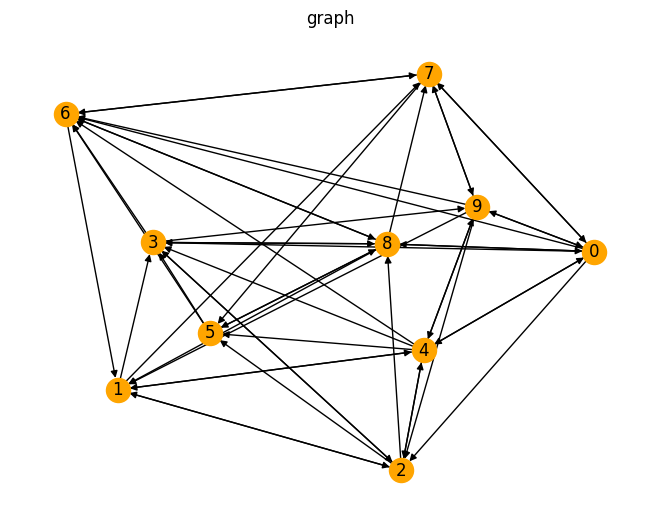

[1, 3, 2]


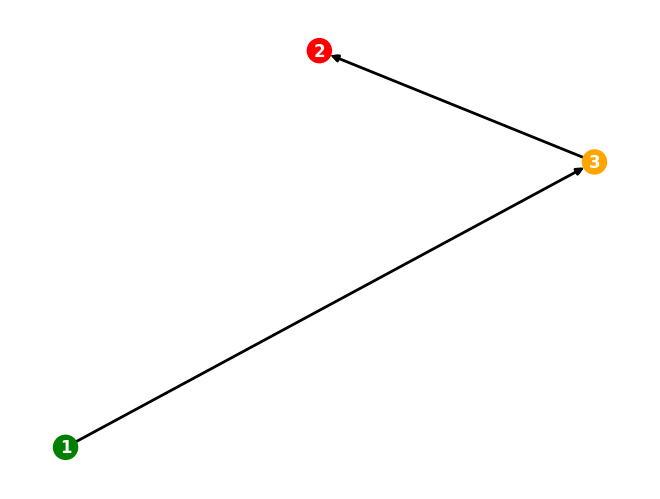

[3, 8, 7]


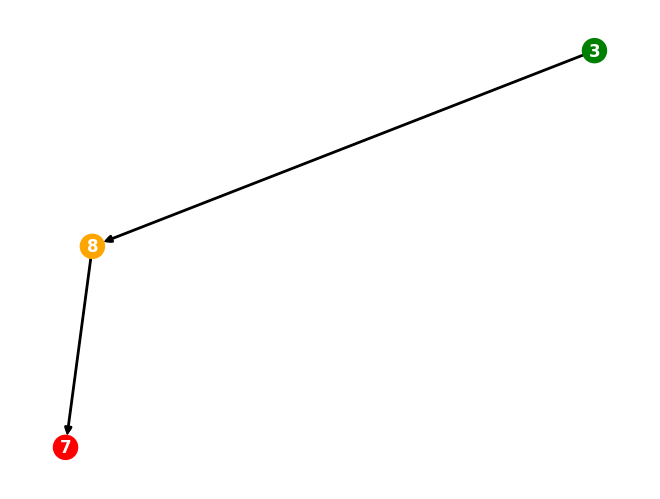

[7, 5, 8]


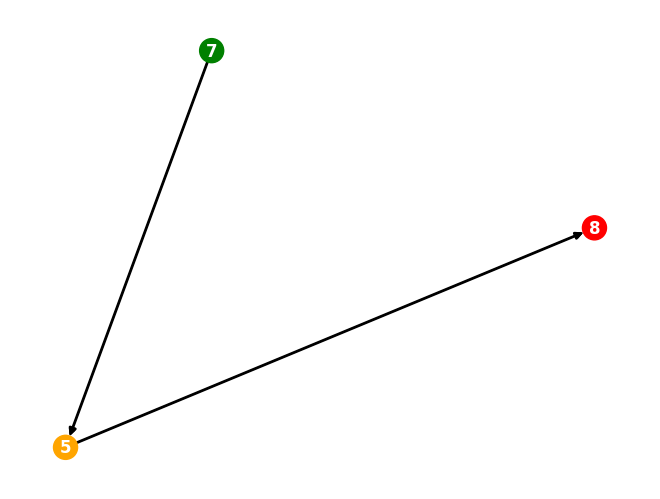

In [8]:
#Graph initialization variables
graph_is_directed = True
number_of_nodes = 10

#random walk variables
number_of_walks = 3
walk_length = 3

walk_graph = generate_graph(graph_is_directed, number_of_nodes)
nx.draw(walk_graph, with_labels=True,node_color='orange')
plt.title("graph")
plt.show()

walks = random_walk(walk_graph,walk_length,number_of_walks)

for walk in walks:
    print(walk)

    #i found a stackoverflow article on how i can display each walk too
    draw_walk(walk_graph,walk)

### Testing Connectivity

In [6]:
def is_connected(Graph, walks):
    num_nodes = Graph.number_of_nodes()
    seen_nodes = [False] * num_nodes  # Initialize a list to keep track of visited nodes

    for walk in walks:
        for node in walk:
            #set that node to true
            seen_nodes[node] = True

    # Count the number of nodes that weren't visited
    not_visited_count = seen_nodes.count(False)

    # If any node is not visited, the graph is not connected
    if not_visited_count > 0:
        return False, not_visited_count
    else:
        return True, 0


Initial check [connected: False, missing nodes: 3]
Secondary check [connected: True, missing nodes: 0]
[0, 9, 1, 5, 2, 4, 8, 9, 4, 0, 1, 2, 4, 1, 5, 2, 4, 5, 9, 2]


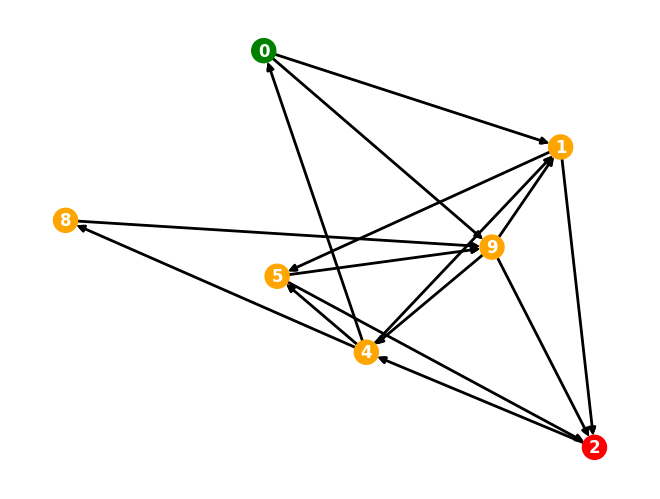

[7, 5, 2, 0, 6, 1, 0, 7, 3, 1, 0, 5, 2, 0, 1, 0, 7, 5, 8, 9]


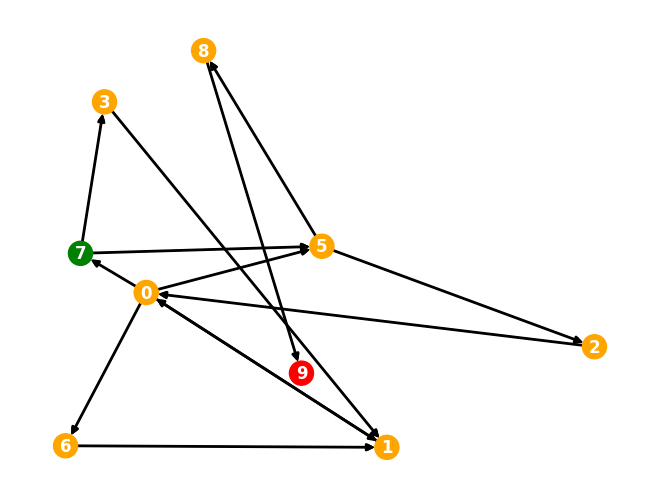

[4, 9, 4, 1, 7, 2, 4, 1, 2, 0, 9, 4, 9, 1, 5, 8, 6, 2, 0, 7]


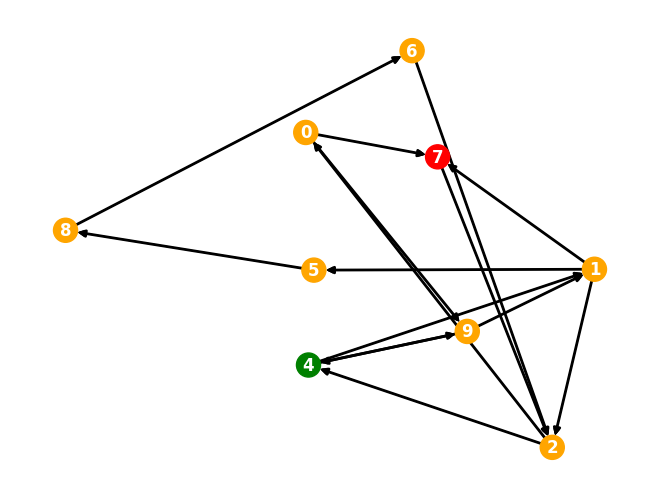

In [7]:
# must be at least the number of nodes in the graph
connectivity1, missing_nodes1 = is_connected(walk_graph, walks)
print("Initial check [" + "connected: "+ str(connectivity1) + ", missing nodes: " + str(missing_nodes1) +"]")

# to better ensure the random walks have checked for connectivity number of steps in the walk is 2x node count
walks2 = random_walk(walk_graph,(number_of_nodes*2),number_of_walks)
connectivity2, missing_nodes2 = is_connected(walk_graph, walks2)
print("Secondary check [" + "connected: "+ str(connectivity2) + ", missing nodes: " + str(missing_nodes2) +"]")
for walk in walks2:
    print(walk)

    #i found a stackoverflow article on how i can display each walk too
    draw_walk(walk_graph,walk)